In [1]:
# src: 
# https://www.opentable.com/state-of-industry
# https://www.kaggle.com/sudalairajkumar/covid19-in-usa?select=us_counties_covid19_daily.csv
# https://www.kaggle.com/imdevskp/corona-virus-report

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [423]:
seat_reserve = pd.read_csv('SeatReserve.csv')
seat_reserve = seat_reserve.transpose()
case_country = pd.read_csv('COVID_case_country.csv')
case_state = pd.read_csv('COVID_State.csv')

In [459]:
index = seat_reserve.index
month = ['Type','Name', 2,3,4,5,6,7,8,9,10,11,12]
countries = seat_reserve.iloc[1]
countries
columns_name = seat_reserve.iloc[0]
columns_name
cols = []
for i in range(len(columns_name)):
    cols.append(countries[i] + '_' + columns_name[i])

In [461]:
newIndex = []
for i in range(len(index)):
    if((index[i][0] == 'T') | (index[i][0] == 'N')):
        newIndex.append(index[i])
    else: 
        newIndex.append(month[int(index[i][0])])

In [462]:
seat_reserve = seat_reserve.set_index([newIndex])

In [463]:
seat_reserve.columns = cols

In [464]:
seat_reserve = seat_reserve[2:]

In [465]:
seat_reserve = seat_reserve.reset_index()

In [466]:
value = seat_reserve.drop('index',axis=1)

In [467]:
value = pd.DataFrame(value, dtype=float)

In [468]:
value['index'] = seat_reserve['index']

In [469]:
seat_reserved_mean = value.groupby(['index']).mean()

In [473]:
seat_reserved_mean

,Global_country,Australia_country,Canada_country,Germany_country,Ireland_country,Mexico_country,United Kingdom_country,United States_country,Alabama_state,Alberta_state,...,San Antonio_city,San Diego_city,San Francisco_city,San Pedro Garza García_city,Scottsdale_city,Seattle_city,Tampa_city,Toronto_city,Vancouver_city,Washington_city
index,,,,,,,,,,,,,,,,,,,,,
2,0.083333,-2.083333,-2.583333,5.750000,-3.666667,-4.250000,-3.000000,1.416667,-1.833333,1.833333,...,-3.750000,0.333333,-2.666667,2.083333,2.000000,4.583333,4.083333,-7.583333,2.666667,10.416667
3,-56.915484,-43.891290,-58.255161,-55.222258,-60.298387,-51.457097,-54.998710,-57.018065,-56.186129,-57.597097,...,-59.903226,-59.018710,-68.151613,-53.451613,-54.826129,-71.548387,-51.355484,-60.677419,-56.380000,-58.322581
4,-99.923333,-100.000000,-99.998667,-99.990333,-99.989333,-99.742667,-100.000000,-99.968000,-100.000000,-100.000000,...,-100.000000,-100.000000,-99.989000,-100.000000,-99.999333,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
5,-92.593226,-94.507742,-96.416774,-73.928387,-98.576452,-98.406452,-99.270645,-92.207742,-77.368710,-91.148710,...,-78.609677,-94.816774,-99.925484,-97.758065,-70.005484,-99.761613,-65.951290,-99.632903,-95.127097,-98.528387
6,-69.979615,-20.648462,-76.037308,-15.982308,-99.312692,-91.337308,-98.831538,-68.872692,-47.870385,-50.808462,...,-59.120000,-67.095769,-96.628077,-77.992308,-41.701154,-93.067308,-41.291538,-98.096538,-72.660000,-90.946538


In [474]:
for i in seat_reserved_mean.columns:
    print(i)

Global_country
Australia_country
Canada_country
Germany_country
Ireland_country
Mexico_country
United Kingdom_country
United States_country
Alabama_state
Alberta_state
Arizona_state
Baja California Sur_state
British Columbia_state
California_state
Colorado_state
Connecticut_state
District of Columbia_state
Florida_state
Georgia_state
Hawaii_state
Illinois_state
Indiana_state
Jalisco_state
Kansas_state
Kentucky_state
Louisiana_state
Maryland_state
Massachusetts_state
Mexico City_state
Michigan_state
Minnesota_state
Missouri_state
Nebraska_state
Nevada_state
New Jersey_state
New Mexico_state
New South Wales_state
New York_state
North Carolina_state
Nuevo Leon_state
Ohio_state
Oklahoma_state
Ontario_state
Oregon_state
Pennsylvania_state
Quebec_state
Queensland_state
Quintana Roo_state
Rhode Island_state
South Carolina_state
Tennessee_state
Texas_state
Utah_state
Victoria_state
Virginia_state
Washington_state
Wisconsin_state
Atlanta_city
Austin_city
Baltimore_city
Boston_city
Calgary_city


In [487]:
State_group = seat_reserved_mean[['Indiana_state','California_state','New York_state',
                                  'Ohio_state','Pennsylvania_state','Washington_state','Florida_state']]

In [486]:
Country_group = seat_reserved_mean[['Australia_country',
'Canada_country',
'Germany_country',
'Ireland_country',
'Mexico_country',
'United Kingdom_country',
'United States_country']]

In [489]:
City_group = seat_reserved_mean[['San Francisco_city','Miami_city','Cincinnati_city','Dallas_city','Indianapolis_city'
                                ,'Chicago_city','Boston_city','San Diego_city']]

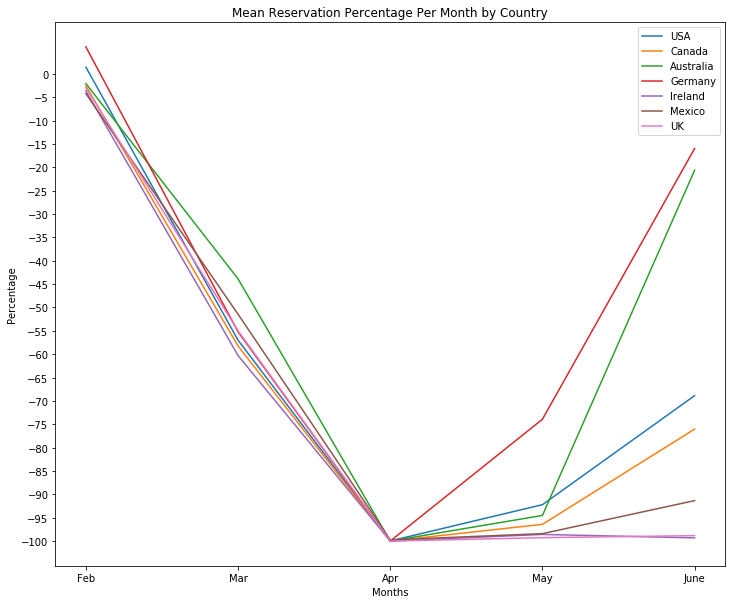

In [490]:
plt.figure(figsize=(12,10))
plt.yticks(np.arange(-100, 5, step=5))
plt.title('Mean Reservation Percentage Per Month by Country')
plt.xlabel('Months')
plt.ylabel('Percentage')
plt.plot(['Feb','Mar','Apr','May','June'],Country_group['United States_country'],label='USA')
plt.plot(['Feb','Mar','Apr','May','June'],Country_group['Canada_country'],label='Canada')
plt.plot(['Feb','Mar','Apr','May','June'],Country_group['Australia_country'],label='Australia')
plt.plot(['Feb','Mar','Apr','May','June'],Country_group['Germany_country'],label='Germany')
plt.plot(['Feb','Mar','Apr','May','June'],Country_group['Ireland_country'],label='Ireland')
plt.plot(['Feb','Mar','Apr','May','June'],Country_group['Mexico_country'],label='Mexico')
plt.plot(['Feb','Mar','Apr','May','June'],Country_group['United Kingdom_country'],label='UK')
plt.legend()

Text(0, 0.5, 'Percentage')

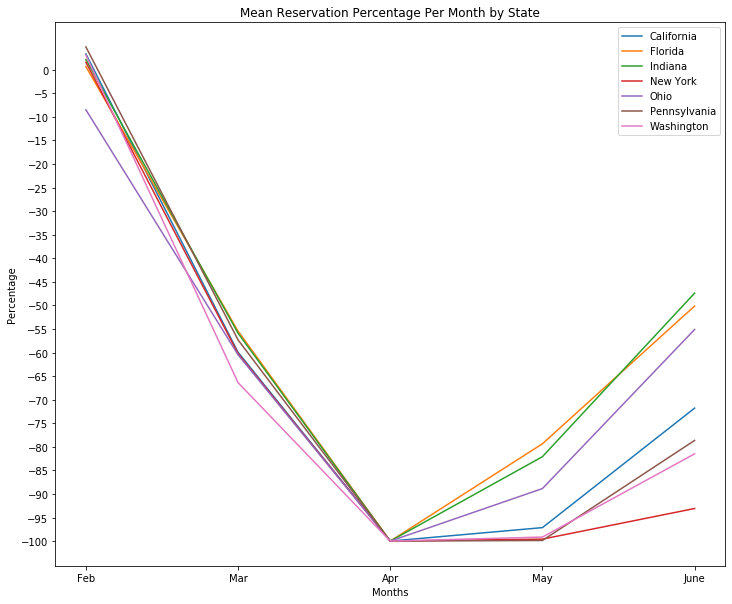

In [497]:
plt.figure(figsize=(12,10))
plt.yticks(np.arange(-100, 5, step=5))

sns.lineplot(['Feb','Mar','Apr','May','June'], State_group['California_state'] ,label='California', sort=False)
sns.lineplot(['Feb','Mar','Apr','May','June'], State_group['Florida_state'] ,label='Florida', sort = False)
sns.lineplot(['Feb','Mar','Apr','May','June'], State_group['Indiana_state'] ,label="Indiana", sort=False)
sns.lineplot(['Feb','Mar','Apr','May','June'], State_group['New York_state'] ,label='New York', sort=False)
sns.lineplot(['Feb','Mar','Apr','May','June'], State_group['Ohio_state'] ,label='Ohio', sort=False)
sns.lineplot(['Feb','Mar','Apr','May','June'], State_group['Pennsylvania_state'] ,label='Pennsylvania', sort=False)
sns.lineplot(['Feb','Mar','Apr','May','June'], State_group['Washington_state'] ,label='Washington', sort=False)
plt.title('Mean Reservation Percentage Per Month by State')
plt.xlabel('Months')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

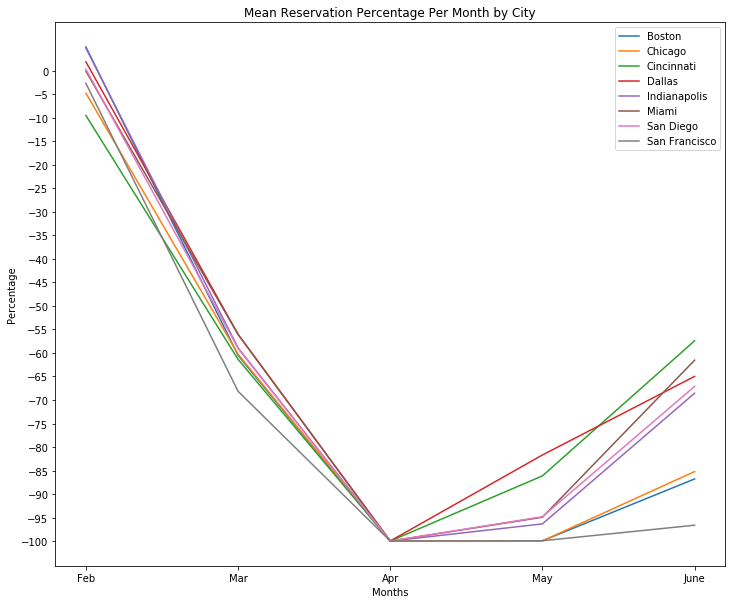

In [496]:
plt.figure(figsize=(12,10))
plt.yticks(np.arange(-100, 5, step=5))

sns.lineplot(['Feb','Mar','Apr','May','June'], City_group['Boston_city'] ,label='Boston', sort=False)
sns.lineplot(['Feb','Mar','Apr','May','June'], City_group['Chicago_city'] ,label='Chicago', sort = False)
sns.lineplot(['Feb','Mar','Apr','May','June'], City_group['Cincinnati_city'] ,label="Cincinnati", sort=False)
sns.lineplot(['Feb','Mar','Apr','May','June'], City_group['Dallas_city'] ,label='Dallas', sort=False)
sns.lineplot(['Feb','Mar','Apr','May','June'], City_group['Indianapolis_city'] ,label='Indianapolis', sort=False)
sns.lineplot(['Feb','Mar','Apr','May','June'], City_group['Miami_city'] ,label='Miami', sort=False)
sns.lineplot(['Feb','Mar','Apr','May','June'], City_group['San Diego_city'] ,label='San Diego', sort=False)
sns.lineplot(['Feb','Mar','Apr','May','June'], City_group['San Francisco_city'] ,label='San Francisco', sort=False)
plt.title('Mean Reservation Percentage Per Month by City')
plt.xlabel('Months')
plt.ylabel('Percentage')

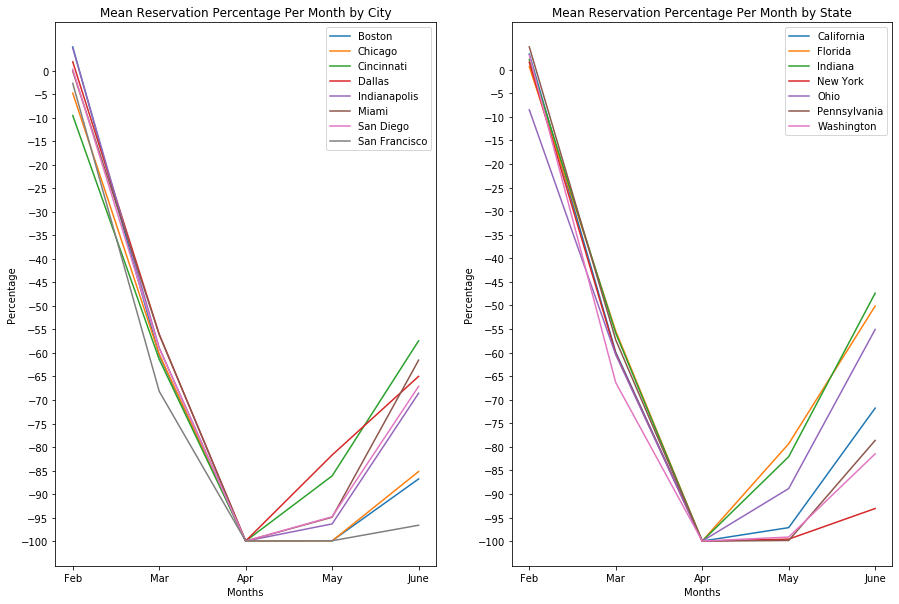

In [540]:
fig, axs = plt.subplots(ncols=2,figsize=(15,10))

axs[0].set_yticks(np.arange(-100, 5, step=5))
axs[0].plot(['Feb','Mar','Apr','May','June'], City_group['Boston_city'] ,label='Boston')
axs[0].plot(['Feb','Mar','Apr','May','June'], City_group['Chicago_city'] ,label='Chicago')
axs[0].plot(['Feb','Mar','Apr','May','June'], City_group['Cincinnati_city'] ,label="Cincinnati")
axs[0].plot(['Feb','Mar','Apr','May','June'], City_group['Dallas_city'] ,label='Dallas')
axs[0].plot(['Feb','Mar','Apr','May','June'], City_group['Indianapolis_city'] ,label='Indianapolis')
axs[0].plot(['Feb','Mar','Apr','May','June'], City_group['Miami_city'] ,label='Miami')
axs[0].plot(['Feb','Mar','Apr','May','June'], City_group['San Diego_city'] ,label='San Diego')
axs[0].plot(['Feb','Mar','Apr','May','June'], City_group['San Francisco_city'] ,label='San Francisco')
axs[0].set_title('Mean Reservation Percentage Per Month by City')
axs[0].set_xlabel('Months')
axs[0].set_ylabel('Percentage')
axs[0].legend()

axs[1].set_yticks(np.arange(-100, 5, step=5))
axs[1].plot(['Feb','Mar','Apr','May','June'], State_group['California_state'] ,label='California')
axs[1].plot(['Feb','Mar','Apr','May','June'], State_group['Florida_state'] ,label='Florida')
axs[1].plot(['Feb','Mar','Apr','May','June'], State_group['Indiana_state'] ,label="Indiana")
axs[1].plot(['Feb','Mar','Apr','May','June'], State_group['New York_state'] ,label='New York')
axs[1].plot(['Feb','Mar','Apr','May','June'], State_group['Ohio_state'] ,label='Ohio')
axs[1].plot(['Feb','Mar','Apr','May','June'], State_group['Pennsylvania_state'] ,label='Pennsylvania')
axs[1].plot(['Feb','Mar','Apr','May','June'], State_group['Washington_state'] ,label='Washington')
axs[1].set_title('Mean Reservation Percentage Per Month by State')
axs[1].set_xlabel('Months')
axs[1].set_ylabel('Percentage')
axs[1].legend()



In [730]:
case_state = pd.read_csv('COVID_State.csv')

In [774]:
case_state.drop(['date', 'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently','inIcuCumulative', 
'onVentilatorCurrently', 'onVentilatorCumulative','dataQualityGrade', 'lastUpdateEt','dateModified',
'checkTimeEt','dateChecked','positiveTestsViral','negativeTestsViral','fips',
'hash', 'commercialScore','negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
'grade','totalTestResultsIncrease', 'posNeg','positiveTestsViral', 'negativeTestsViral','total'],axis=1,inplace=True)

In [657]:
case_state.columns

Index(['state', 'positive', 'negative', 'pending', 'recovered', 'death',
       'hospitalized', 'totalTestsViral', 'positiveCasesViral',
       'positiveIncrease', 'negativeIncrease', 'totalTestResults',
       'deathIncrease', 'hospitalizedIncrease'],
      dtype='object')

In [568]:
case_state['pending'] = case_state['pending'].fillna(0)

In [650]:
case_state['hospitalized'] = case_state['hospitalized'].fillna(0)

In [665]:
case_state['totalTestsViral'] = case_state['totalTestsViral'].fillna(0)

In [585]:
case_state['recovered'] = case_state['recovered'].fillna(0)

In [789]:
# Because if nan + # it becomes nan -> no means can be calculated -> set to 0
for i in case_state.drop('state',axis=1).columns:
    mean_byState = case_state[['state',i]].groupby('state').mean().reset_index()
    table = {}
    def input(state, val):
        if(np.isnan(val)):
            table[state] = 0
        else:
            table[state] = val

    mean_byState.apply(lambda x : input(x['state'],x[i]),axis=1)
    def replace(val,state):
        if np.isnan(val):
            return table[state]
        else:
            return val
    case_state[i] = case_state.apply(lambda x : replace(x[i], x['state']),axis=1)

In [791]:
case_state.isna().sum()

state                   0
positive                0
negative                0
pending                 0
recovered               0
death                   0
hospitalized            0
totalTestsViral         0
positiveCasesViral      0
positiveIncrease        0
negativeIncrease        0
totalTestResults        0
deathIncrease           0
hospitalizedIncrease    0
dtype: int64